In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
bank = pd.read_csv("/content/bank.csv")
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
print(bank.columns) #This gives names of all columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')


In [ ]:
print(bank['job'].value_counts())

job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: count, dtype: int64


In [ ]:
print(bank['marital'].value_counts())

marital
married     6351
single      3518
divorced    1293
Name: count, dtype: int64


In [ ]:
bank['education'].value_counts()

,count
education,
secondary,5476
tertiary,3689
primary,1500
unknown,497


In [ ]:
bank['housing'].value_counts()

,count
housing,
no,5881
yes,5281


In [ ]:
bank['loan'].value_counts()

,count
loan,
no,9702
yes,1460


In [ ]:
bank['contact'].value_counts()

,count
contact,
cellular,8042
unknown,2346
telephone,774


In [ ]:
bank['month'].value_counts()

,count
month,
may,2824
aug,1519
jul,1514
jun,1222
nov,943
apr,923
feb,776
oct,392
jan,344


In [ ]:
bank['poutcome'].value_counts()

,count
poutcome,
unknown,8326
failure,1228
success,1071
other,537


In [ ]:
bank['deposit'].value_counts()

,count
deposit,
no,5873
yes,5289


In [ ]:
bank['default'].value_counts()

,count
default,
no,10994
yes,168


In [ ]:
from sklearn.preprocessing import LabelEncoder
bank[['job','marital','education','default','housing','loan','contact','month','poutcome','deposit']]=bank[['job','marital','education','default','housing','loan','contact','month','poutcome','deposit']].apply(LabelEncoder().fit_transform)

In [ ]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


[0 1] [5873 5289]


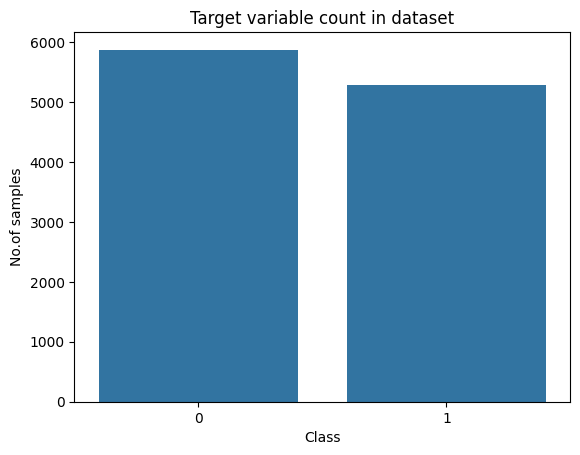

In [ ]:
(unique, counts)=np.unique(bank['deposit'], return_counts=True)
print(unique,counts)
sns.barplot(x=unique, y=counts)
plt.xlabel('Class')
plt.ylabel('No.of samples')
plt.title('Target variable count in dataset')
plt.show()

In [ ]:
X=bank.iloc[:,:-1]
Y=bank.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
import matplotlib.pyplot as plt
# Initializing the Logistic Regression model
model = LogisticRegression()

In [ ]:
# Training the model
model.fit(X_train, Y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# Making predictions on the test set
predictions = model.predict(X_test)

In [ ]:
# Evaluating the model
accuracy = accuracy_score(Y_test, predictions)
conf_matrix = confusion_matrix(Y_test, predictions)
print(conf_matrix)
print("Accuracy of model: ",accuracy)

[[911 255]
 [306 761]]
Accuracy of model:  0.7487684729064039


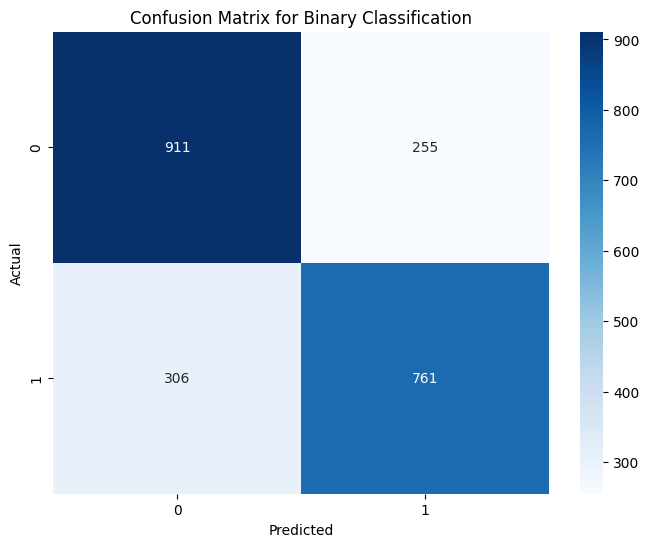

In [ ]:
# Visualizing the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix for Binary Classification')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
precision = precision_score(Y_test, predictions)
print("Precision:", precision)

Precision: 0.7490157480314961


In [ ]:
recall = recall_score(Y_test, predictions)
print("Recall:", recall)

Recall: 0.7132146204311153
